In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading the Data into a Data Frame

In [2]:
df=pd.read_csv('googleplaystore.csv')


## Exploring the data

In [3]:
#Display Max cols and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Disable warning
import warnings
warnings.filterwarnings("ignore")

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
print(f'The Number of rows are {df.shape[0]}, and {df.shape[1]} columns')
print(f'Names of the colums:\n {df.columns}')
df.info()

The Number of rows are 10841, and 13 columns
Names of the colums:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 

In [5]:
df.describe()


,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


__________________________
#### Size should also be a numeric as Ratings and Reviews, but its data type is object, so I guess should convert it to the float.
__________________________________

#### So let's examine the rows of Column Size

In [6]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

#### There are three different string/characters that are stopping it to be numeric
1. 'M' which represents the filesize in Mb
2. 'k' which represents the filesize in Kb
3. 'Varies with device' That represents variable file sizes for different versions of Android.

_____________________
#### The least unit in the Size column is kb, let's convert that into Mb so we can have not very high values
- A function examine and convert the supplied value can perform the task when applied on all the rows one by one. So, writing that.


In [7]:
def conv2kb(size):
    if isinstance(size,str):
        if 'k' in size:
            return format(float(str(size).replace('k',""))/1024,'.3f')
        if 'M' in size:
            return float(str(size).replace('M',""))
    else: 
        return(size)



#### Now let's apply the function on the data and see what ir returns

- We will impute the 'varies with device' by the mean of the column

In [8]:
a=0
df['Size']=df['Size'].str.replace('Varies with device','0.00')  ## replacing the string with a placeholder float, so we can calculate the mean value and since float of 0.00 will become NaN so we can replace it using fillna.
df['Size']=df['Size'].apply(lambda x: conv2kb(x)) #  df['Size'].loc[a]=conv2kb(df['Size'].loc[a])
# now as the column is of object data type and we can't calculate the mean of it, so changing the data type to float so the mean can be calculated and imputed in rows with 0.00 value
df['Size']=pd.to_numeric(df['Size'], errors='raise')
df['Size'].fillna(format(df['Size'].mean(), '.1f'), inplace=True )
df['Size']=pd.to_numeric(df['Size'], errors='raise')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


#### Since the column has been updated as per our plan and converted into float, now let's rename it to size_Mb so we can remember that all the values in the column are in Megabytes.

In [9]:
# Now in order to keep it in the record, that all Size rows are defined in Kb we will rename to columns.
df.rename(columns={"Size":"size_Mb"}, errors="raise", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   size_Mb         10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


#### Objective for Size is achieved here, let's move further

_____________________

### Dealing with Installs Columns

In [10]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

   #### Operations to be performed on Installs
1. Remove the '+' Sign
2. converting it to the integer

In [11]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+', ""))
df['Installs']=df['Installs'].apply(lambda x: x.replace(',', ""))

In [12]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [13]:
df['Installs']=df['Installs'].apply(lambda x: int(x))

#### Now let's make a bin for Installs. The same needs to be done with reviews.

In [14]:
df['Install_bins'] = pd.cut(x=df['Installs'], bins=[0, 1000, 100000, 10000000,100000000,1000000000,], labels=[1,2,3,4,5])
df['Install_bins']=pd.to_numeric(df['Install_bins'], errors='raise')
# Reviews Bins Might also be required
df['Reviews_bins'] = pd.cut(x=df['Reviews'], bins=[0, 100, 10000, 100000,1000000,100000000,], labels=[1,2,3,4,5])
df['Reviews_bins']=pd.to_numeric(df['Install_bins'], errors='raise')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   size_Mb         10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


_________________________
### Now let's convert price into Numeric

In [15]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

#### Let's remove the $ size and convert it to the float

In [16]:
df['Price']=df['Price'].apply(lambda x: x.replace('$', ''))
df['Price']=pd.to_numeric(df['Price'], errors='raise')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   size_Mb         10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   size_Mb         10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


_____
## Now Let's Check and Fill the Nulls

In [18]:
df.describe()

,Rating,Reviews,size_Mb,Installs,Price
count,9367.000000,1.084100e+04,10841.00000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.51193,1.546291e+07,1.027273
std,0.515735,2.927629e+06,20.74761,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.00800,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.90000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,18.00000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26.00000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.00000,1.000000e+09,400.000000


In [19]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
size_Mb              0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Deleting rows from the df which are nan in Current Ver, Android Ver Genres and Type, as these are less than 0.1%


In [20]:
df=df[~df['Current Ver'].isna() & ~df['Genres'].isna() & ~df['Type'].isna() & ~df['Android Ver'].isna()]
df.isnull().sum()
df.head(10)


,App,Category,Rating,Reviews,size_Mb,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


__________
### Initial Assessment:
- Ratings have plenty of Nans around 20% that needs to be filled. 
- Nans do not belong to single category or price or size or installs group but distribution is pretty normallized accross the data. So we can't fill it with simple Mean, Median or Mode etc.
### Tackling Plan:
- We will see the correlation between the different columns.
- Identify the relationship between different columns and decide.
- If required will use ML/DL to fill the missing data.

In [21]:
df['Reviews'].max()

78158306

In [22]:
#Let's separate the relevant data to do the further analysis
#df2=pd.DataFrame([df.Installs,df.Reviews, df.Price, df.Rating]).transpose()
df2=df[['Installs', 'Reviews', 'Price', 'Rating']]
# Creating another dataframe without nulls for analysis
df3=df2.dropna()
df3['Install_bins'] = pd.cut(x=df3['Installs'], bins=[0, 1000, 100000, 10000000,100000000,1000000000,], labels=[1,2,3,4,5])
df3['Install_bins']=pd.to_numeric(df3['Install_bins'], errors='raise')
# Reviews Bins Might also be required
df3['Reviews_bins'] = pd.cut(x=df3['Reviews'], bins=[0, 100, 10000, 100000,1000000,100000000,], labels=[1,2,3,4,5])
df3['Reviews_bins']=pd.to_numeric(df3['Install_bins'], errors='raise')



In [23]:
import plotly.express as px
df3['Install_bins'].value_counts()
px.box(x=df3['Install_bins'].unique(), y=df3.groupby(df3['Install_bins'])['Rating'].mean())
df3.groupby(df3['Install_bins'])['Rating'].describe()
df3.corr()

,Installs,Reviews,Price,Rating,Install_bins,Reviews_bins
Installs,1.000000,0.641605,-0.011895,0.051337,0.438762,0.438762
Reviews,0.641605,1.000000,-0.009824,0.068133,0.334226,0.334226
Price,-0.011895,-0.009824,1.000000,-0.021919,-0.059588,-0.059588
Rating,0.051337,0.068133,-0.021919,1.000000,0.125543,0.125543
Install_bins,0.438762,0.334226,-0.059588,0.125543,1.000000,1.000000
Reviews_bins,0.438762,0.334226,-0.059588,0.125543,1.000000,1.000000


### Now Let's Train the model to fill the nulls.
- Df3 contains the non null values of all the Numeric variables that we think might affect the ratings. 
- Now we will train and test a regression model on df3
- Once trained and tested, we will predict the null values in df

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X=df3[['Reviews_bins', 'Install_bins', 'Price']]
y=df3[['Rating']]
X_train,X_test,y_train, y_test=train_test_split(X,y,train_size=0.9, random_state=42)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)



0.011906195221174087

### Regression Machine Learning returns 1.3% accurate model, let's try Convolutional Neural Network and see if we can improve the accuracy

In [25]:
import tensorflow as tf
import numpy as np
import seaborn as sns
print(tf.__version__)

2.14.0


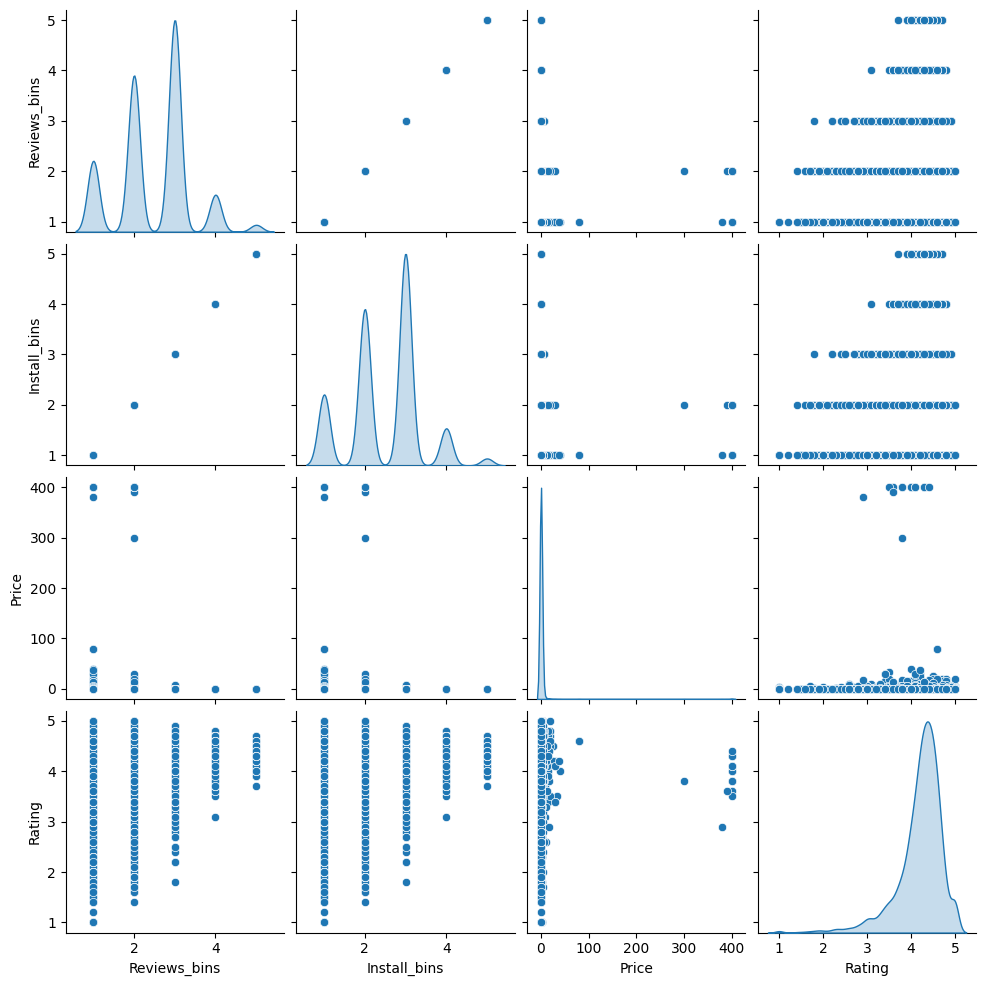

In [26]:

# Creating the Test and Train datasets from the existing datasets we used for sklearn
train=X_train
train=train.join(y_train)
test=X_test
test=test.join(y_test)
y_train=y_train/5
X_train['Install_bins']=X_train['Install_bins']/5
X_train['Reviews_bins']=X_train['Reviews_bins']/5
y_test=y_test/5
X_test['Install_bins']=X_test['Install_bins']/5
X_test['Reviews_bins']=X_test['Reviews_bins']/5

sns.pairplot(data=train,diag_kind='kde')

In [27]:
print(X_train.describe())
print(y_test.describe())

       Reviews_bins  Install_bins        Price
count   8424.000000   8424.000000  8424.000000
mean       0.497555      0.497555     0.979658
std        0.176915      0.176915    16.080490
min        0.200000      0.200000     0.000000
25%        0.400000      0.400000     0.000000
50%        0.600000      0.600000     0.000000
75%        0.600000      0.600000     0.000000
max        1.000000      1.000000   400.000000
           Rating
count  936.000000
mean     0.833996
std      0.106673
min      0.200000
25%      0.800000
50%      0.860000
75%      0.900000
max      1.000000


In [77]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(256,activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    tf.keras.layers.Dense(512,activation=tf.nn.relu, use_bias=True),
    tf.keras.layers.Dense(512,activation=tf.nn.leaky_relu,use_bias=True),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(512,activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(256)     
])
#model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001) , loss='mse', metrics=['mae','mse'])
model.compile(optimizer=tf.keras.optimizers.Adam(0.01) , loss='mae', metrics=['mae','mse'])

model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 256)               1024      
                                                                 
 dense_66 (Dense)            (None, 512)               131584    
                                                                 
 dense_67 (Dense)            (None, 512)               262656    
                                                                 
 dense_68 (Dense)            (None, 512)               262656    
                                                                 
 dense_69 (Dense)            (None, 512)               262656    
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
Total params: 1051904 (4.01 MB)
Trainable params: 105

In [66]:
import matplotlib.pyplot as plt
def plot_history(history):
    hist=pd.DataFrame(history.history)
    hist['epoch']=history.epoch
    hist1=[]
#hist1=hist.tail(550)
    hist1=hist
#sns.lineplot(data=histsamp, y='val_mse', x='epoch')

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist1['epoch'],hist1['mae'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mae'], label='Val_Error')
    plt.legend()
#plt.ylim([0, 0.2])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist1['epoch'],hist1['mse'], label='Train Error')
    plt.plot(hist1['epoch'], hist1['val_mse'], label='Val_Error')
    plt.legend()

In [78]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

history=model.fit(X_train,y_train, epochs=1200, validation_split=0.2, callbacks=[early_stop])
#evaluate the model
print('Test accuracy:', model.evaluate(X_test,y_test))


Epoch 1/1200


### Analyze the training

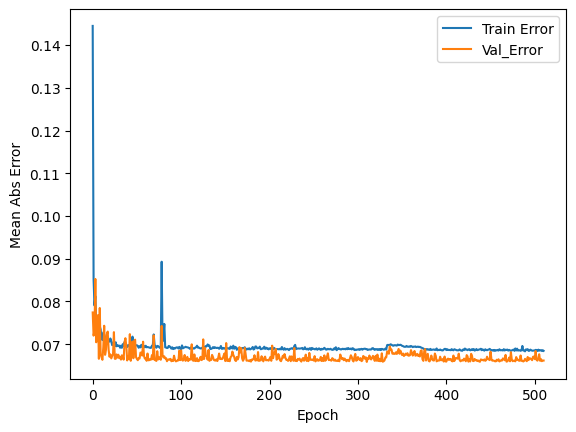

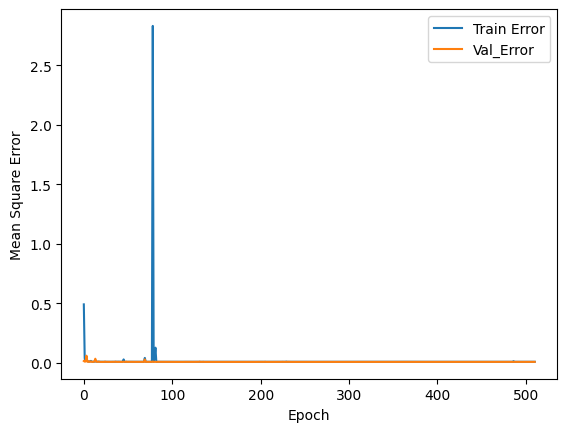

In [74]:

plot_history(history)

## Observations;
- Although the graphs show learning improvement after 50 epoch, so probably we should have run the model for max 100 EPOCH, any EPOCH afterwards don't reduce the error significantly, neither there's downwards trend in the errors after around 50 epoch.
- Validation and Training Error curves are not significantly difference.
- 

### Test the Model

## Let's evaluate the model item by item for predicted results

30/30 [==============================] - 0s 5ms/step


,Reviews_bins,Install_bins,Price,Rating,Predicted Rating,error,percent error
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.492949,0.492949,0.795865,0.833996,0.859124,0.025128,5.668833
std,0.165576,0.165576,13.272915,0.106673,0.017566,0.105394,24.044281
min,0.200000,0.200000,0.000000,0.200000,0.777636,-0.162122,-16.212231
25%,0.400000,0.400000,0.000000,0.800000,0.837878,-0.038506,-4.278437
50%,0.600000,0.600000,0.000000,0.860000,0.861494,0.001494,0.173728
75%,0.600000,0.600000,0.000000,0.900000,0.861494,0.061494,7.686758
max,1.000000,1.000000,399.990000,1.000000,0.889661,0.687243,343.621457


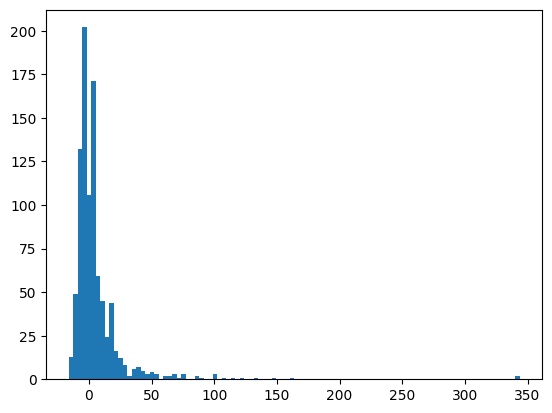

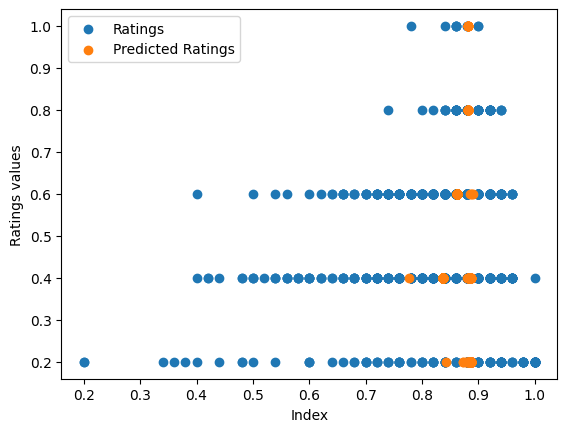

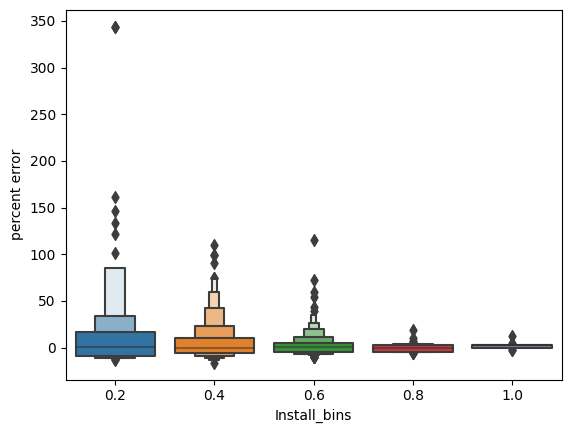

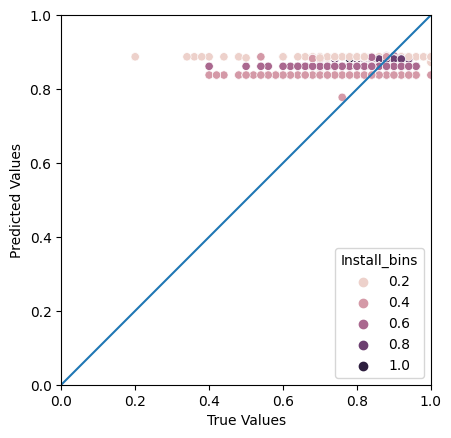

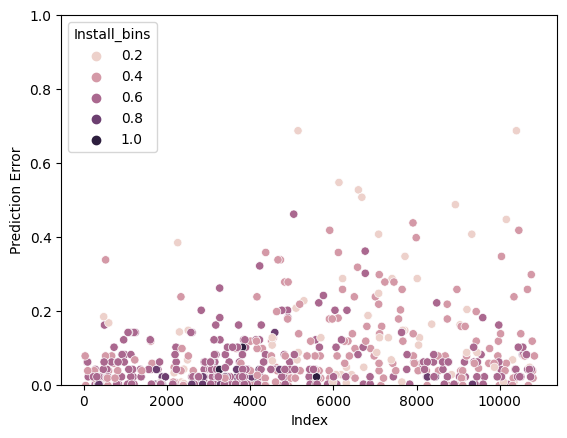

In [75]:


def plotresults(results):
    results['error']=results['Predicted Rating']-results['Rating']

    results['percent error']=100*results['error']/results['Rating']
    plt.figure(1)
    plt.hist(results['percent error'], bins=100)
    plt.figure(2)
    plt.xlabel('Index')
    plt.ylabel('Ratings values')
    plt.scatter(results['Rating'],results['Install_bins'], label='Ratings')
    plt.scatter(results['Predicted Rating'],results['Install_bins'], label='Predicted Ratings')
    plt.legend()
    
    plt.figure(3)
    sns.boxenplot(data=results, y='percent error', x='Install_bins')
    
    plt.figure(4)
    sns.scatterplot(data=results, x='Rating', y='Predicted Rating', hue='Install_bins')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,1])
    plt.ylim([0,1])
    _=plt.plot([-100,100],[-100,100])
    plt.figure(5)
    sns.scatterplot(data=results, x=results.index, y='error', hue='Install_bins')
    plt.xlabel('Index')
    plt.ylabel('Prediction Error')
    #plt.axis('equal')
    #plt.axis('square')
    plt.ylim([0,1])
    results.describe()
a=0
results=X_test
y_results=model.predict(X_test)
results=results.join(y_test)
res = np.empty(shape=(len(y_results),), dtype=object)
while a <=935:
    res[a]=y_results[a][0]
    a=a+1
 
results['Predicted Rating']=res.tolist()
plotresults(results)
results.describe()


### Result of DL Model
- Although the predicted values fall in the ranges and they are not outliers, but these are not very accourate.
- Good thing is that mean difference between predicted and supplied rating is 3% of the supplied rating ranges under 10% with around 30% with error more than 10%.
- Since the predicted values are falling under the average Ratings in any install bins and with 70% with error under 10%. we can still use it to fill the nan.

In [ ]:
results[results['percent error'].between(-10,10)].info()

### Let's Train and Test the model again with some callbacks.

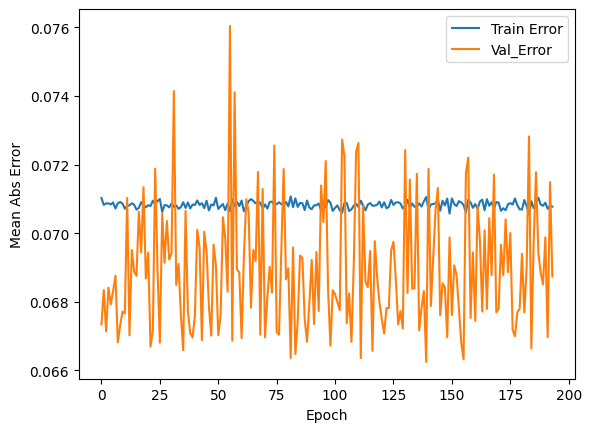

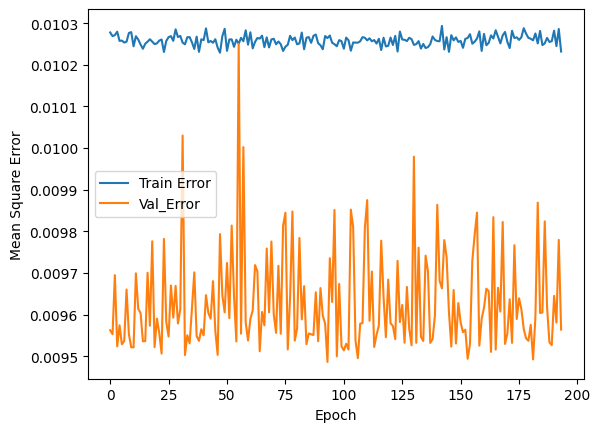

In [34]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history=model.fit(X_train,y_train,epochs=1000, validation_split=0.2, verbose=0, callbacks=[early_stop])
plot_history(history)


## Let's Evaluate the results of the 2nd training.

In [ ]:

results=X_test
y_results=model.predict(X_test)
results=results.join(y_test)
a=0
res = np.empty(shape=(len(y_results),), dtype=object)
while a <=935:
    res[a]=y_results[a][0]
    a=a+1
 
results['Predicted Rating']=res.tolist()
plotresults(results)
results.describe()

### Result of DL Model
- No or very low correlation between the predicted values and the true values.
- Although the predicted values fall in the ranges and they are not outliers, but these are not very accourate.
- Good thing is that mean difference between predicted and supplied rating is 3% of the supplied rating ranges under 10% with around 30% with error more than 10%.
- Since the predicted values are falling under the average Ratings in any install bins and with 70% with error under 10%. we can still use it to fill the nan.
- ________________

_____
### Now let's visualize the data

In [ ]:
import plotly.express as px


#### Price Vs Ratings

In [ ]:
px.scatter(x=df['Category'],y=df['Price'], color=df['Rating'])

In [ ]:
px.bar(x=df['Rating'], y=df['Price'],color=df['Category'])

In [ ]:
px.bar(x=df['Category'].unique(), y=df['Price'].groupby(df['Category']).mean(), color=df['Installs'].groupby(df['Category']).sum())

In [ ]:
px.sunburst(df, path=['Category', 'Rating', 'Reviews'], values='Installs', color='Android Ver')

In [ ]:

px.pie(x=df['Category'].unique(), y=df['Installs'].groupby(df['Category']).mean(), color=df['Rating'].groupby(df['Category']).mean())